In [1]:
# import dataset for custodial death during production
import pandas as pd
df1 = pd.read_csv('custodial_death_during_production.csv', warn_bad_lines = False, error_bad_lines = False)
df1 = df1.iloc[:, [0, 1, 4]]
df1.rename(columns = {'Area_Name': 'STATE/UT', 'CD_Deaths_Reported': 'Deaths'}, inplace = True)
cd_prod = df1
cd_prod

,STATE/UT,Year,Deaths
0,Andhra Pradesh,2001,3
1,Arunachal Pradesh,2001,0
2,Assam,2001,0
3,Bihar,2001,0
4,Chandigarh,2001,0
...,...,...,...
199,Meghalaya,2010,0
200,Mizoram,2010,0
201,Nagaland,2010,0
202,Odisha,2010,1


In [2]:
# import the dataset for custodial death during hospitalization or treatment
df2 = pd.read_csv('custodial_death_during_hospitalization_or_treatment.csv', warn_bad_lines = False, error_bad_lines = False)
df2 = df2.iloc[:, [0, 1, 4]]
df2.rename(columns = {'Area_Name': 'STATE/UT', 'CD_Hospitalisation_Treatment': 'Deaths'}, inplace = True)
cd_hosp = df2
cd_hosp

,STATE/UT,Year,Deaths
0,Andhra Pradesh,2001,15
1,Arunachal Pradesh,2001,1
2,Bihar,2001,0
3,Chandigarh,2001,0
4,Chhattisgarh,2001,0
...,...,...,...
208,Nagaland,2010,0
209,Odisha,2010,0
210,Tamil Nadu,2010,1
211,Uttar Pradesh,2010,0


In [3]:
# import the dataset for custodial death of remanded person
df3 = pd.read_csv('custodial_death_person_remanded.csv', warn_bad_lines = False, error_bad_lines = False)
df3 = df3.iloc[:, [0, 1, 4]]
df3.rename(columns = {'Area_Name': 'STATE/UT', 'CD_Deaths_Reported': 'Deaths'}, inplace = True)
df3 = df3.dropna(axis=0, how = 'any')
df3.isnull().sum()
df3['Deaths'] =  df3['Deaths'].astype(int)
cd_remanded = df3
cd_remanded

,STATE/UT,Year,Deaths
0,Andhra Pradesh,2001,5
1,Arunachal Pradesh,2001,0
2,Assam,2001,1
3,Bihar,2001,0
4,Chandigarh,2001,0
...,...,...,...
206,Odisha,2010,1
207,Rajasthan,2010,1
208,Tamil Nadu,2010,1
209,Tripura,2010,1


In [4]:
# import the dataset for custodial death of person those who are not remanded
df4 = pd.read_csv('custodial_death_person_not_remanded.csv', warn_bad_lines = False, error_bad_lines = False)
df4 = df4.iloc[:, [0, 1, 4]]
df4.rename(columns = {'Area_Name': 'STATE/UT', 'CD_Deaths_Reported': 'Deaths'}, inplace = True)
df4 = df4.dropna(axis=0, how = 'any')
df4['Deaths'] =  df4['Deaths'].astype(int)
cd_notremanded = df4
cd_notremanded

,STATE/UT,Year,Deaths
0,Andhra Pradesh,2001,8
1,Arunachal Pradesh,2001,0
2,Assam,2001,2
3,Bihar,2001,0
4,Chandigarh,2001,0
...,...,...,...
223,Odisha,2010,0
224,Punjab,2010,2
225,Tamil Nadu,2010,1
226,Uttar Pradesh,2010,9


In [5]:
# import the dataset for custodial death due to some other reason
deaths = []
df5 = pd.read_csv('custodial_death_others.csv', warn_bad_lines = False, error_bad_lines = False)
df5 = df5.fillna(0)
for i in range(len(df5)):
    s = 0
    for j in range(4, 10):
        s = s + df5.iloc[i, j]
    deaths.append(s)
df5['deaths'] = deaths
df5['deaths'] = df5['deaths'].astype(int)
df5 = df5.iloc[:, [0, 1, 10]]
df5.rename(columns = {'Area_Name': 'STATE/UT', 'deaths': 'Deaths'}, inplace = True)
cd_other = df5
cd_other

,STATE/UT,Year,Deaths
0,Andhra Pradesh,2001,5
1,Arunachal Pradesh,2001,0
2,Bihar,2001,0
3,Chandigarh,2001,1
4,Chhattisgarh,2001,1
...,...,...,...
228,Punjab,2010,2
229,Rajasthan,2010,1
230,Tamil Nadu,2010,1
231,Uttar Pradesh,2010,8


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
def analysis(df, s):
    p = sns.relplot(data = df, x = "Year", y = "Deaths", hue = "STATE/UT", height = 8.27)
    p.set(title = s)
    plt.show()

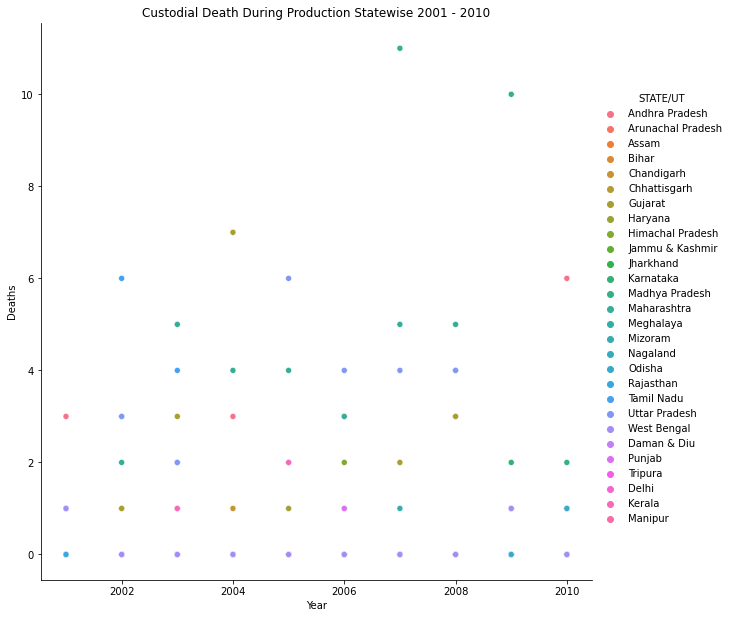

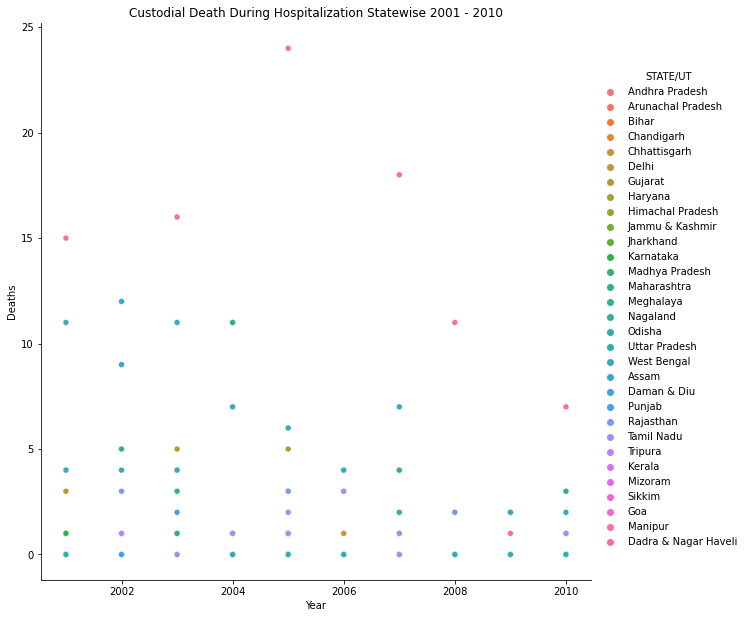

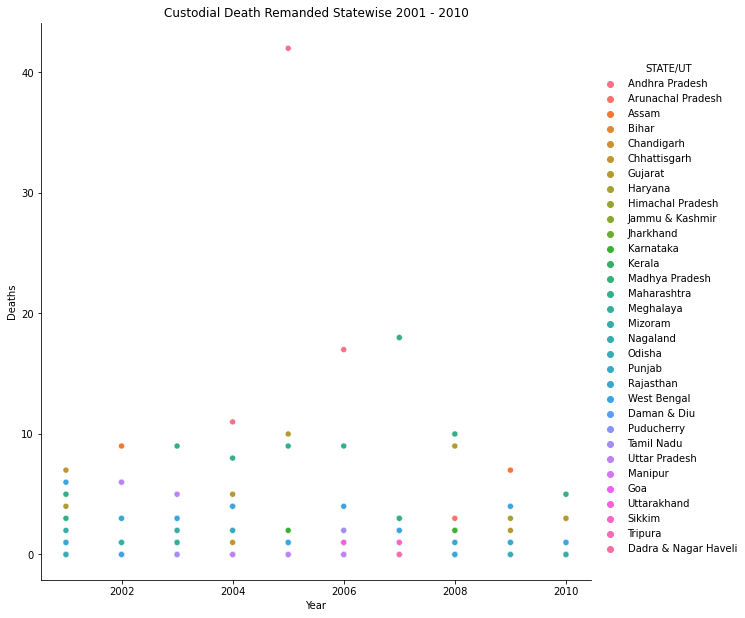

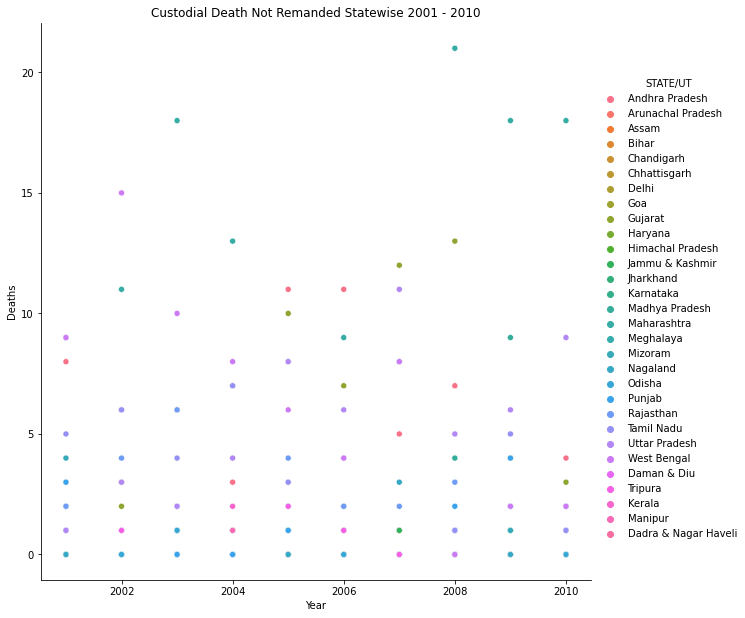

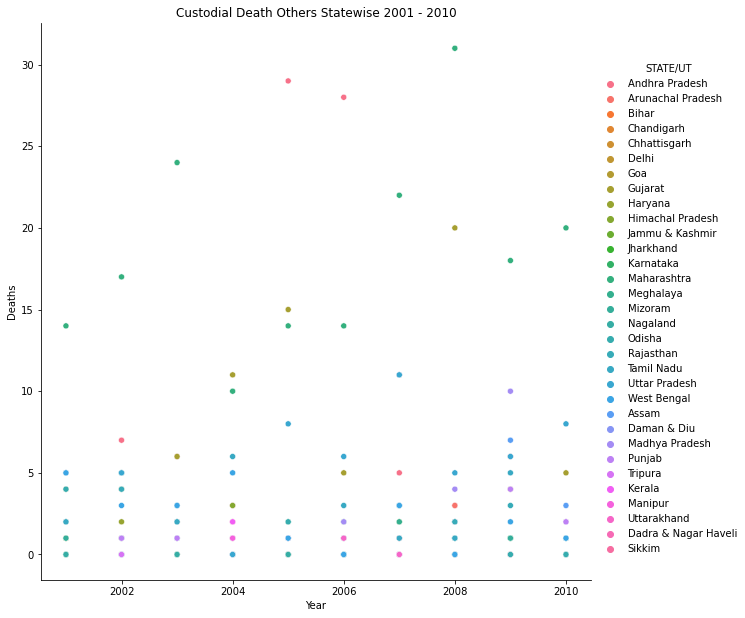

In [7]:
analysis(cd_prod, 'Custodial Death During Production Statewise 2001 - 2010')
analysis(cd_hosp, 'Custodial Death During Hospitalization Statewise 2001 - 2010')
analysis(cd_remanded, 'Custodial Death Remanded Statewise 2001 - 2010')
analysis(cd_notremanded, 'Custodial Death Not Remanded Statewise 2001 - 2010')
analysis(cd_other, 'Custodial Death Others Statewise 2001 - 2010')